# Learn Keras for Deep Neural Networks
## Chapter 3 - Deep Neural Networks for Supervised Learning - Regression

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns  #Seaborn is another powerful visulization library for Python

In [2]:
df = pd.read_excel("C:\\Users\jmatney\Documents\ML Research\data\IN_22HUCS_05062020.xlsx")

In [3]:
df

,subwatershed,area,perimeter,circulatory_ratio,relief,avg_slope_pct,watershed_length,elongation_ratio,drainage_density,shape_factor,...,orb25yr12ha_am,orb25yr24ha_am,orb2yr06ha_am,orb2yr12ha_am,orb2yr24ha_am,orb50yr06ha_am,orb50yr12ha_am,orb50yr24ha_am,policy_total_building_coverage_sum,claims_amt_paid_building_sum
0,50800030204,71.677298,46.020782,0.425288,71.490857,3.892551,21.657336,0.441104,5.281157,6.543776,...,3912.360352,4591.765625,1896.639648,2242.855957,2625.774658,3746.630615,4338.225098,5094.054199,3.663931e+06,2.835924e+04
1,51201020403,90.022814,54.601063,0.379455,42.432038,1.726250,16.964608,0.631084,4.668109,3.196945,...,4029.500000,4679.166504,1872.608643,2151.637695,2509.688477,4039.384033,4587.246582,5299.992676,5.763717e+06,1.008557e+04
2,51201061303,61.214067,56.265707,0.242982,28.827573,0.963398,10.675799,0.826952,4.797476,1.861871,...,4337.876465,4963.820312,2012.820190,2333.910156,2660.348389,4319.809082,4909.359375,5617.482910,2.558848e+07,1.054929e+05
3,51201130502,88.814228,62.557067,0.285194,60.097282,3.027722,22.169999,0.479657,4.508082,5.534123,...,4626.451660,5566.014648,2115.970459,2494.177734,2983.962891,4525.881348,5231.496094,6303.637207,1.251721e+05,1.190123e+03
4,51202010605,85.414836,48.154895,0.462873,16.629288,1.359579,12.156831,0.857830,4.343422,1.730244,...,4216.592285,4884.453613,1936.653809,2270.423096,2649.507812,4237.330566,4808.053711,5509.884766,6.314080e+07,1.616797e+05
5,51202010904,88.482299,76.322877,0.190878,78.148281,4.050000,28.472564,0.372784,0.790956,9.162136,...,4257.825684,4785.931641,1934.969727,2294.325684,2698.500000,4247.946777,4821.795410,5336.211914,1.671698e+09,1.184182e+06
6,51202011005,51.500430,49.690827,0.262101,84.497872,2.590000,22.401481,0.361480,0.844906,9.744120,...,4281.631348,4837.552734,1941.171021,2295.526367,2701.723633,4294.013184,4858.105469,5409.420898,6.951249e+08,1.721612e+05
7,51202011006,84.595867,75.123204,0.188370,79.277004,3.260000,25.074297,0.413905,1.016808,7.432046,...,4260.167969,4798.815918,1934.647949,2290.583984,2693.575928,4261.839844,4829.983887,5357.832031,1.784689e+09,1.176577e+06
8,51202011109,70.790345,55.883574,0.284850,82.916985,2.480000,20.348676,0.466558,1.196911,5.849225,...,4288.432617,4845.648438,1946.351318,2299.270264,2714.981934,4307.450684,4862.693848,5414.107910,3.640330e+08,1.595035e+05
9,51202011110,54.559599,58.231638,0.202192,81.845429,3.610000,17.736718,0.469913,0.966828,5.766009,...,4282.108398,4830.373535,1946.771118,2298.481934,2720.566162,4305.867676,4852.976074,5389.494141,2.456838e+08,1.110673e+05


In [4]:
print("Shape of the Dataset:",df.shape)
#the head method displays the first 5 rows of the data
df.head(5)  


Shape of the Dataset: (22, 62)


,subwatershed,area,perimeter,circulatory_ratio,relief,avg_slope_pct,watershed_length,elongation_ratio,drainage_density,shape_factor,...,orb25yr12ha_am,orb25yr24ha_am,orb2yr06ha_am,orb2yr12ha_am,orb2yr24ha_am,orb50yr06ha_am,orb50yr12ha_am,orb50yr24ha_am,policy_total_building_coverage_sum,claims_amt_paid_building_sum
0,50800030204,71.677298,46.020782,0.425288,71.490857,3.892551,21.657336,0.441104,5.281157,6.543776,...,3912.360352,4591.765625,1896.639648,2242.855957,2625.774658,3746.630615,4338.225098,5094.054199,3.663931e+06,28359.24083
1,51201020403,90.022814,54.601063,0.379455,42.432038,1.726250,16.964608,0.631084,4.668109,3.196945,...,4029.500000,4679.166504,1872.608643,2151.637695,2509.688477,4039.384033,4587.246582,5299.992676,5.763717e+06,10085.57355
2,51201061303,61.214067,56.265707,0.242982,28.827573,0.963398,10.675799,0.826952,4.797476,1.861871,...,4337.876465,4963.820312,2012.820190,2333.910156,2660.348389,4319.809082,4909.359375,5617.482910,2.558848e+07,105492.93850
3,51201130502,88.814228,62.557067,0.285194,60.097282,3.027722,22.169999,0.479657,4.508082,5.534123,...,4626.451660,5566.014648,2115.970459,2494.177734,2983.962891,4525.881348,5231.496094,6303.637207,1.251721e+05,1190.12263
4,51202010605,85.414836,48.154895,0.462873,16.629288,1.359579,12.156831,0.857830,4.343422,1.730244,...,4216.592285,4884.453613,1936.653809,2270.423096,2649.507812,4237.330566,4808.053711,5509.884766,6.314080e+07,161679.67500


# Metadata
*	**subwatershed** - a unique Id for each subwatershed

### Data Exploration

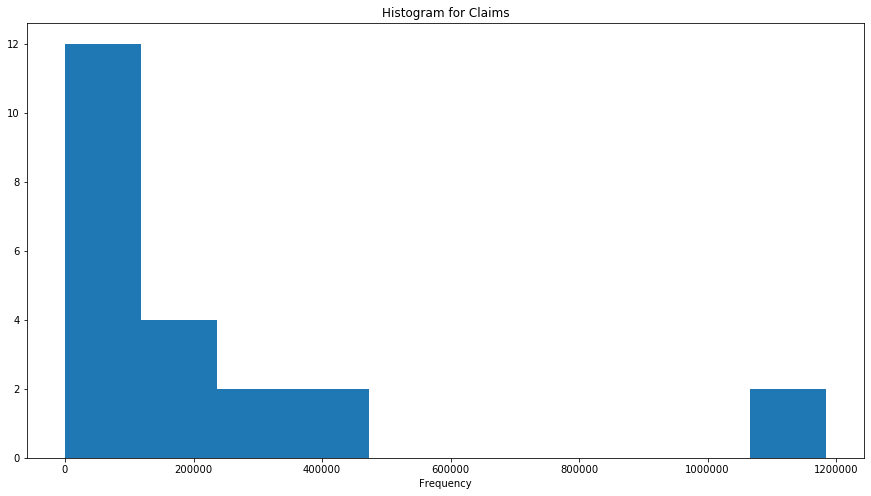

In [5]:
#Import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline

#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8)) 
plt.hist(df["claims_amt_paid_building_sum"])  
plt.title("Histogram for Claims")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257C2EC8AC8>,
      dtype=object)

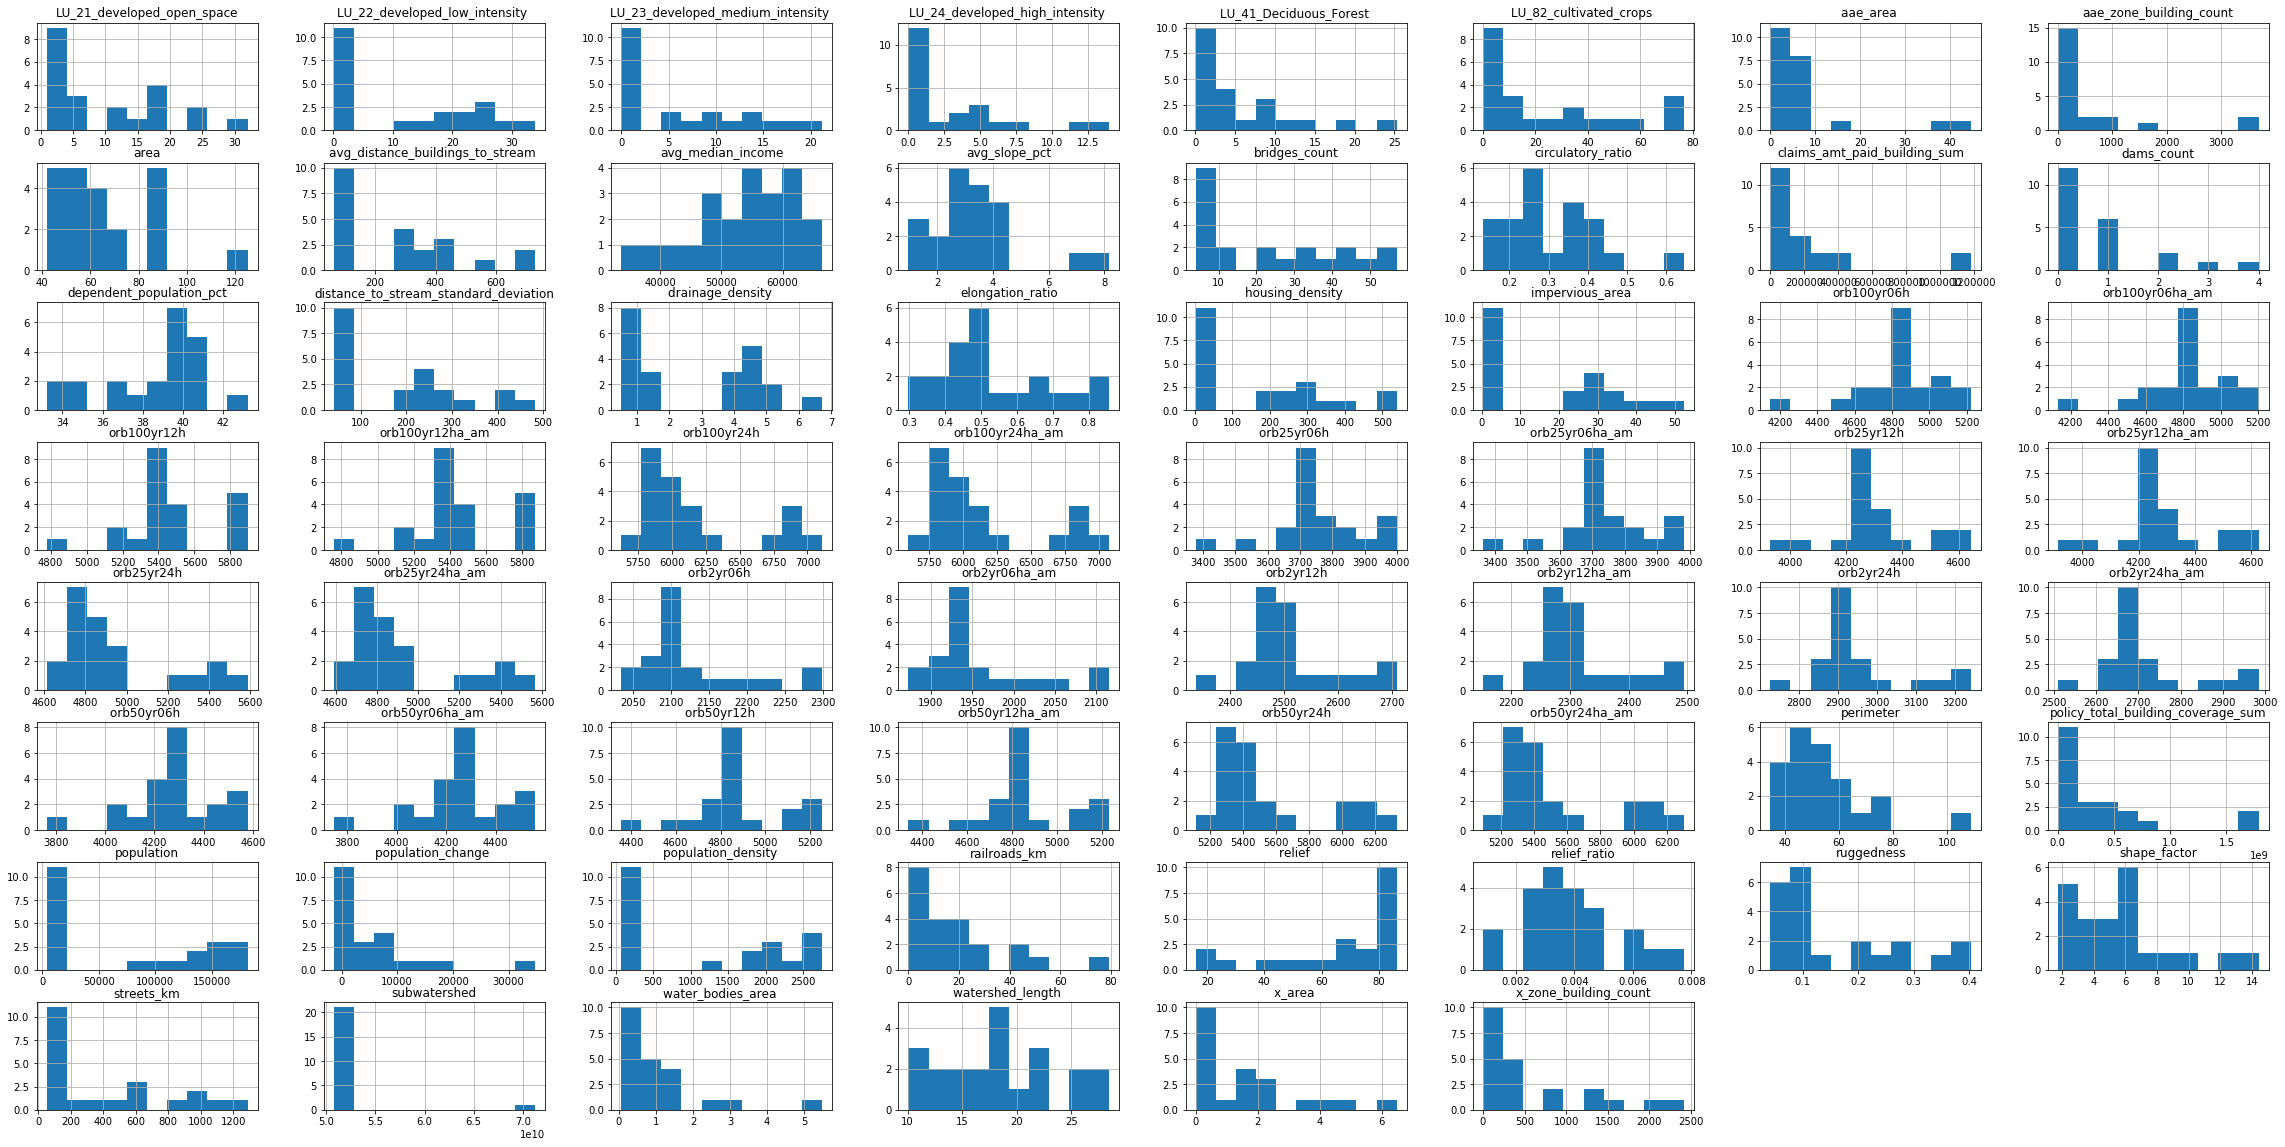

In [6]:
#Use the  histogram function provided by the Pandas object
#The function returns a cross-tab histogram plot for all numeric columns in the data
df.hist(figsize=(40,20))


In [7]:
df.isnull().sum()/df.shape[0] * 100

subwatershed                          0.0
area                                  0.0
perimeter                             0.0
circulatory_ratio                     0.0
relief                                0.0
                                     ... 
orb50yr06ha_am                        0.0
orb50yr12ha_am                        0.0
orb50yr24ha_am                        0.0
policy_total_building_coverage_sum    0.0
claims_amt_paid_building_sum          0.0
Length: 62, dtype: float64

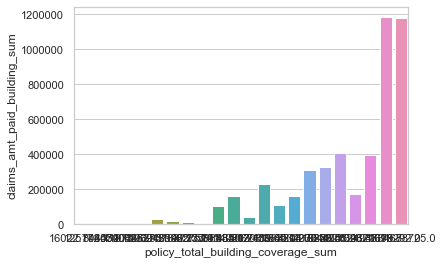

In [8]:
sns.set(style="whitegrid")

#Create the bar plot for Average Sales acrss different Seasons
ax = sns.barplot(x="policy_total_building_coverage_sum", y="claims_amt_paid_building_sum", data=df) 



### Data Engineering

In [9]:
#Define a variable for each type of feature
target = ["claims_amt_paid_building_sum"]
test = [x for x in df if x != "claims_amt_paid_building_sum"]
numeric_columns = [x for x in test if x != "subwatershed"]

In [10]:
numeric_columns

['area',
 'perimeter',
 'circulatory_ratio',
 'relief ',
 'avg_slope_pct',
 'watershed_length ',
 'elongation_ratio',
 'drainage_density ',
 'shape_factor',
 'relief_ratio',
 'ruggedness',
 'aae_area ',
 'aae_zone_building_count',
 'x_area ',
 'x_zone_building_count',
 'water_bodies_area ',
 'dams_count',
 'bridges_count',
 'streets_km',
 'railroads_km',
 'avg_distance_buildings_to_stream ',
 'distance_to_stream_standard_deviation',
 'population',
 'population_density ',
 'avg_median_income',
 'housing_density ',
 'population_change ',
 'dependent_population_pct',
 'LU_21_developed_open_space',
 'LU_22_developed_low_intensity ',
 'LU_23_developed_medium_intensity ',
 'LU_24_developed_high_intensity ',
 'LU_41_Deciduous_Forest ',
 'LU_82_cultivated_crops ',
 'impervious_area ',
 'orb100yr06h',
 'orb100yr12h',
 'orb100yr24h',
 'orb25yr06h ',
 'orb25yr12h ',
 'orb25yr24h',
 'orb2yr06h ',
 'orb2yr12h',
 'orb2yr24h ',
 'orb50yr06h ',
 'orb50yr12h ',
 'orb50yr24h',
 'orb100yr06ha_am',
 'orb1

In [11]:
print("Shape of Data:",df.shape)
print("Distinct Datatypes:",df.dtypes.unique())
df[numeric_columns].head(5)

Shape of Data: (22, 62)
Distinct Datatypes: [dtype('int64') dtype('float64')]


,area,perimeter,circulatory_ratio,relief,avg_slope_pct,watershed_length,elongation_ratio,drainage_density,shape_factor,relief_ratio,...,orb25yr06ha_am,orb25yr12ha_am,orb25yr24ha_am,orb2yr06ha_am,orb2yr12ha_am,orb2yr24ha_am,orb50yr06ha_am,orb50yr12ha_am,orb50yr24ha_am,policy_total_building_coverage_sum
0,71.677298,46.020782,0.425288,71.490857,3.892551,21.657336,0.441104,5.281157,6.543776,0.003301,...,3363.810791,3912.360352,4591.765625,1896.639648,2242.855957,2625.774658,3746.630615,4338.225098,5094.054199,3.663931e+06
1,90.022814,54.601063,0.379455,42.432038,1.726250,16.964608,0.631084,4.668109,3.196945,0.002501,...,3544.362305,4029.500000,4679.166504,1872.608643,2151.637695,2509.688477,4039.384033,4587.246582,5299.992676,5.763717e+06
2,61.214067,56.265707,0.242982,28.827573,0.963398,10.675799,0.826952,4.797476,1.861871,0.002700,...,3796.943848,4337.876465,4963.820312,2012.820190,2333.910156,2660.348389,4319.809082,4909.359375,5617.482910,2.558848e+07
3,88.814228,62.557067,0.285194,60.097282,3.027722,22.169999,0.479657,4.508082,5.534123,0.002711,...,3981.940674,4626.451660,5566.014648,2115.970459,2494.177734,2983.962891,4525.881348,5231.496094,6303.637207,1.251721e+05
4,85.414836,48.154895,0.462873,16.629288,1.359579,12.156831,0.857830,4.343422,1.730244,0.001368,...,3687.446045,4216.592285,4884.453613,1936.653809,2270.423096,2649.507812,4237.330566,4808.053711,5509.884766,6.314080e+07


### Feature Selection using the LassoCV estimator

In [12]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

Automatically created module for IPython interactive environment


In [13]:
X = df[numeric_columns]

In [32]:
X.head(5)

,area,perimeter,circulatory_ratio,relief,avg_slope_pct,watershed_length,elongation_ratio,drainage_density,shape_factor,relief_ratio,...,orb25yr06ha_am,orb25yr12ha_am,orb25yr24ha_am,orb2yr06ha_am,orb2yr12ha_am,orb2yr24ha_am,orb50yr06ha_am,orb50yr12ha_am,orb50yr24ha_am,policy_total_building_coverage_sum
0,71.677298,46.020782,0.425288,71.490857,3.892551,21.657336,0.441104,5.281157,6.543776,0.003301,...,3363.810791,3912.360352,4591.765625,1896.639648,2242.855957,2625.774658,3746.630615,4338.225098,5094.054199,3.663931e+06
1,90.022814,54.601063,0.379455,42.432038,1.726250,16.964608,0.631084,4.668109,3.196945,0.002501,...,3544.362305,4029.500000,4679.166504,1872.608643,2151.637695,2509.688477,4039.384033,4587.246582,5299.992676,5.763717e+06
2,61.214067,56.265707,0.242982,28.827573,0.963398,10.675799,0.826952,4.797476,1.861871,0.002700,...,3796.943848,4337.876465,4963.820312,2012.820190,2333.910156,2660.348389,4319.809082,4909.359375,5617.482910,2.558848e+07
3,88.814228,62.557067,0.285194,60.097282,3.027722,22.169999,0.479657,4.508082,5.534123,0.002711,...,3981.940674,4626.451660,5566.014648,2115.970459,2494.177734,2983.962891,4525.881348,5231.496094,6303.637207,1.251721e+05
4,85.414836,48.154895,0.462873,16.629288,1.359579,12.156831,0.857830,4.343422,1.730244,0.001368,...,3687.446045,4216.592285,4884.453613,1936.653809,2270.423096,2649.507812,4237.330566,4808.053711,5509.884766,6.314080e+07


In [15]:
y = df[target]
X = df[numeric_columns]
clf = LassoCV().fit(X, y.values.ravel())
importance = np.abs(clf.coef_)
print(importance)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00063431]


In [16]:
feature_names = numeric_columns
idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.01

idx_features = (-importance).argsort()[:2]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

sfm = SelectFromModel(clf, threshold=threshold)
sfm.fit(X, y.values.ravel())
X_transform = sfm.transform(X)

n_features = sfm.transform(X).shape[1]

Selected features: ['policy_total_building_coverage_sum' 'LU_41_Deciduous_Forest ']


C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


### Min Max Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df_scale = scaler.transform(df)
df_scale

array([[0.00000000e+00, 3.58051421e-01, 1.52535939e-01, ...,
        0.00000000e+00, 2.04402111e-03, 2.39483879e-02],
       [1.96564010e-02, 5.79003459e-01, 2.68180937e-01, ...,
        1.70255762e-01, 3.22058742e-03, 8.51691442e-03],
       [1.96584059e-02, 2.32033051e-01, 2.90617006e-01, ...,
        4.32734841e-01, 1.43289362e-02, 8.90851001e-02],
       ...,
       [1.97083961e-02, 1.82192990e-01, 1.02532667e-01, ...,
        8.79416735e-01, 5.70425011e-04, 4.43398135e-04],
       [1.97084010e-02, 7.91313312e-02, 4.44092597e-02, ...,
        8.49404536e-01, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.21141519e-01, 1.76451901e-01, ...,
        7.27349866e-01, 5.49764788e-03, 7.28574124e-03]])

In [18]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

## Train Test Split

In [19]:
#Create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(df[numeric_columns],df[target],test_size=0.2,random_state=2018)
# Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2018)

#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (15, 60)
Shape of x_val: (2, 60)
Shape of x_test: (5, 60)
Shape of y_train: (15, 1)
Shape of y_val: (2, 1)
Shape of y_test: (5, 1)


### Creating Baseline Accuracy

In [20]:
#calcualte the average score of the train dataset
mean_claims = y_train.mean()
print("Average Claims :",mean_claims) 



Average Claims : claims_amt_paid_building_sum    117740.955497
dtype: float64


In [21]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_claims).mean()[0])

MAE for Test Data: 307994.50713573594


### Designing the Deep Neural Network

In [22]:
#Create Deep Neural Network Architecuture
from keras import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(150,input_dim = 60,activation="relu"))
#The input_dim =44, since the width of the training data=44 (refer data engg section)
model.add(Dense(1,activation = "linear"))

#Configure the model
model.compile(optimizer='adam', loss="mean_absolute_error", 
metrics=["mean_absolute_error"])

#Train the model
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=10,batch_size=64)


Using TensorFlow backend.


Train on 15 samples, validate on 2 samples
Epoch 1/10
15/15 [==============================] - 0s 21ms/step - loss: 14087004.0000 - mean_absolute_error: 14087004.0000 - val_loss: 54635440.0000 - val_mean_absolute_error: 54635440.0000
Epoch 2/10
15/15 [==============================] - 0s 333us/step - loss: 12332100.0000 - mean_absolute_error: 12332100.0000 - val_loss: 45667168.0000 - val_mean_absolute_error: 45667168.0000
Epoch 3/10
15/15 [==============================] - 0s 267us/step - loss: 10307782.0000 - mean_absolute_error: 10307782.0000 - val_loss: 36087972.0000 - val_mean_absolute_error: 36087972.0000
Epoch 4/10
15/15 [==============================] - 0s 200us/step - loss: 8145295.5000 - mean_absolute_error: 8145295.5000 - val_loss: 26211738.0000 - val_mean_absolute_error: 26211738.0000
Epoch 5/10
15/15 [==============================] - 0s 267us/step - loss: 5916109.0000 - mean_absolute_error: 5916109.0000 - val_loss: 16119652.0000 - val_mean_absolute_error: 16119652.0000
Ep

In [23]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test,y_test)

#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

5/5 [==============================] - 0s 200us/step
Metric  loss : 12089212.0
Metric  mean_absolute_error : 12089212.0


In [24]:
model = Sequential()
model.add(Dense(150,input_dim = 60,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

history = model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=10,batch_size=64)

#result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))


Train on 15 samples, validate on 2 samples
Epoch 1/10
15/15 [==============================] - 0s 33ms/step - loss: 31511887740928.0000 - mean_absolute_error: 3510496.0000 - val_loss: 1140615404322816.0000 - val_mean_absolute_error: 24020244.0000
Epoch 2/10
15/15 [==============================] - 0s 333us/step - loss: 73564057239552.0000 - mean_absolute_error: 5400000.5000 - val_loss: 190822595166208.0000 - val_mean_absolute_error: 9824261.0000
Epoch 3/10
15/15 [==============================] - 0s 334us/step - loss: 12086364078080.0000 - mean_absolute_error: 2197198.7500 - val_loss: 201609069985792.0000 - val_mean_absolute_error: 10100579.0000
Epoch 4/10
15/15 [==============================] - 0s 267us/step - loss: 13581422690304.0000 - mean_absolute_error: 2299455.5000 - val_loss: 480351189204992.0000 - val_mean_absolute_error: 15590466.0000
Epoch 5/10
15/15 [==============================] - 0s 266us/step - loss: 32010825367552.0000 - mean_absolute_error: 3538663.2500 - val_loss: 

In [25]:
model = Sequential()
model.add(Dense(150,input_dim = 60,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64)

result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Train on 15 samples, validate on 2 samples
Epoch 1/15
15/15 [==============================] - 1s 45ms/step - loss: 492191809536.0000 - mean_absolute_error: 429564.8750 - val_loss: 2126147324215296.0000 - val_mean_absolute_error: 32796726.0000
Epoch 2/15
15/15 [==============================] - 0s 333us/step - loss: 137622613655552.0000 - mean_absolute_error: 7382244.5000 - val_loss: 135216249176064.0000 - val_mean_absolute_error: 8271066.5000
Epoch 3/15
15/15 [==============================] - 0s 333us/step - loss: 8518899859456.0000 - mean_absolute_error: 1847874.1250 - val_loss: 397662700437504.0000 - val_mean_absolute_error: 14182799.0000
Epoch 4/15
15/15 [==============================] - 0s 400us/step - loss: 26524252110848.0000 - mean_absolute_error: 3217228.2500 - val_loss: 691575902437376.0000 - val_mean_absolute_error: 18704140.0000
Epoch 5/15
15/15 [==============================] - 0s 267us/step - loss: 45904685957120.0000 - mean_absolute_error: 4238243.0000 - val_loss: 387

In [26]:
model = Sequential()
model.add(Dense(350,input_dim = 60,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64)

result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))


Train on 15 samples, validate on 2 samples
Epoch 1/15
15/15 [==============================] - 0s 30ms/step - loss: 14856053850112.0000 - mean_absolute_error: 2404069.7500 - val_loss: 9839218171838464.0000 - val_mean_absolute_error: 70552456.0000
Epoch 2/15
15/15 [==============================] - 0s 467us/step - loss: 639989654224896.0000 - mean_absolute_error: 15901908.0000 - val_loss: 437297833050112.0000 - val_mean_absolute_error: 14873717.0000
Epoch 3/15
15/15 [==============================] - 0s 467us/step - loss: 28000154288128.0000 - mean_absolute_error: 3338345.0000 - val_loss: 3131088872407040.0000 - val_mean_absolute_error: 39799244.0000
Epoch 4/15
15/15 [==============================] - 0s 400us/step - loss: 206050636595200.0000 - mean_absolute_error: 8997642.0000 - val_loss: 5704477315170304.0000 - val_mean_absolute_error: 53719676.0000
Epoch 5/15
15/15 [==============================] - 0s 400us/step - loss: 374648957042688.0000 - mean_absolute_error: 12137897.0000 - va

### Training the model with increased number of epochs

In [27]:
from keras.callbacks import History 
history = History()

model = Sequential()
model.add(Dense(350,input_dim = 60,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val), 
epochs=15,batch_size=64,callbacks=[history])

result = model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))


Train on 15 samples, validate on 2 samples
Epoch 1/15
15/15 [==============================] - 1s 45ms/step - loss: 63041710325760.0000 - mean_absolute_error: 5002425.0000 - val_loss: 5188227614900224.0000 - val_mean_absolute_error: 51230044.0000
Epoch 2/15
15/15 [==============================] - 0s 600us/step - loss: 340787099336704.0000 - mean_absolute_error: 11574411.0000 - val_loss: 4927127027712.0000 - val_mean_absolute_error: 1579953.5000
Epoch 3/15
15/15 [==============================] - 0s 600us/step - loss: 271633530880.0000 - mean_absolute_error: 340633.5938 - val_loss: 598504632221696.0000 - val_mean_absolute_error: 17400976.0000
Epoch 4/15
15/15 [==============================] - 0s 600us/step - loss: 38437449105408.0000 - mean_absolute_error: 3909007.5000 - val_loss: 28704474398720.0000 - val_mean_absolute_error: 3811544.0000
Epoch 5/15
15/15 [==============================] - 0s 667us/step - loss: 1739581292544.0000 - mean_absolute_error: 843473.1875 - val_loss: 3306947

### Visualing the final results

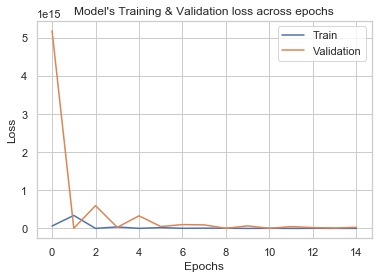

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [29]:
#Manually predicting from the model, instead of using model's evaluate function
y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Claims","Predicted Claims"]
print(y_test.head(10))

# #Manually predicting from the model, instead of using model's evaluate function
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Claims"].values,y_test["Predicted Claims"].values))
print("MAE :",mean_absolute_error(y_test["Actual Claims"].values,y_test["Predicted Claims"].values))

    Actual Claims  Predicted Claims
7    1.176577e+06      9.600352e+06
14   3.966252e+05      4.466855e+06
4    1.616797e+05      3.401743e+05
3    1.190123e+03      9.159951e+02
8    1.595035e+05      1.958854e+06
MSE : 18159255673943.71
MAE : 2894424.8830547696


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

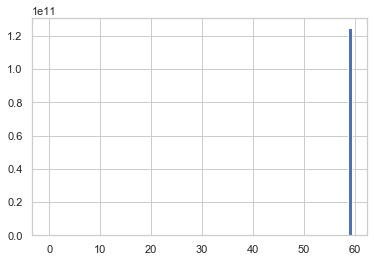

In [30]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [31]:
X

,area,perimeter,circulatory_ratio,relief,avg_slope_pct,watershed_length,elongation_ratio,drainage_density,shape_factor,relief_ratio,...,orb25yr06ha_am,orb25yr12ha_am,orb25yr24ha_am,orb2yr06ha_am,orb2yr12ha_am,orb2yr24ha_am,orb50yr06ha_am,orb50yr12ha_am,orb50yr24ha_am,policy_total_building_coverage_sum
0,71.677298,46.020782,0.425288,71.490857,3.892551,21.657336,0.441104,5.281157,6.543776,0.003301,...,3363.810791,3912.360352,4591.765625,1896.639648,2242.855957,2625.774658,3746.630615,4338.225098,5094.054199,3.663931e+06
1,90.022814,54.601063,0.379455,42.432038,1.726250,16.964608,0.631084,4.668109,3.196945,0.002501,...,3544.362305,4029.500000,4679.166504,1872.608643,2151.637695,2509.688477,4039.384033,4587.246582,5299.992676,5.763717e+06
2,61.214067,56.265707,0.242982,28.827573,0.963398,10.675799,0.826952,4.797476,1.861871,0.002700,...,3796.943848,4337.876465,4963.820312,2012.820190,2333.910156,2660.348389,4319.809082,4909.359375,5617.482910,2.558848e+07
3,88.814228,62.557067,0.285194,60.097282,3.027722,22.169999,0.479657,4.508082,5.534123,0.002711,...,3981.940674,4626.451660,5566.014648,2115.970459,2494.177734,2983.962891,4525.881348,5231.496094,6303.637207,1.251721e+05
4,85.414836,48.154895,0.462873,16.629288,1.359579,12.156831,0.857830,4.343422,1.730244,0.001368,...,3687.446045,4216.592285,4884.453613,1936.653809,2270.423096,2649.507812,4237.330566,4808.053711,5509.884766,6.314080e+07
5,88.482299,76.322877,0.190878,78.148281,4.050000,28.472564,0.372784,0.790956,9.162136,0.002745,...,3715.242432,4257.825684,4785.931641,1934.969727,2294.325684,2698.500000,4247.946777,4821.795410,5336.211914,1.671698e+09
6,51.500430,49.690827,0.262101,84.497872,2.590000,22.401481,0.361480,0.844906,9.744120,0.003772,...,3746.907959,4281.631348,4837.552734,1941.171021,2295.526367,2701.723633,4294.013184,4858.105469,5409.420898,6.951249e+08
7,84.595867,75.123204,0.188370,79.277004,3.260000,25.074297,0.413905,1.016808,7.432046,0.003162,...,3722.552002,4260.167969,4798.815918,1934.647949,2290.583984,2693.575928,4261.839844,4829.983887,5357.832031,1.784689e+09
8,70.790345,55.883574,0.284850,82.916985,2.480000,20.348676,0.466558,1.196911,5.849225,0.004075,...,3760.837891,4288.432617,4845.648438,1946.351318,2299.270264,2714.981934,4307.450684,4862.693848,5414.107910,3.640330e+08
9,54.559599,58.231638,0.202192,81.845429,3.610000,17.736718,0.469913,0.966828,5.766009,0.004614,...,3760.807129,4282.108398,4830.373535,1946.771118,2298.481934,2720.566162,4305.867676,4852.976074,5389.494141,2.456838e+08
